In [1]:
from abc import ABC, abstractmethod
from typing import Optional
import enum as en
import numpy as np
import itertools as it
import more_itertools as mit
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sys
import os
import sympy as sp
import scipy as sci
from scipy.spatial import distance_matrix
import operator as op
import random

In [2]:
from libs.environment.utils import *
from libs.utils.graph import *

<AxesSubplot:xlabel='x', ylabel='y'>

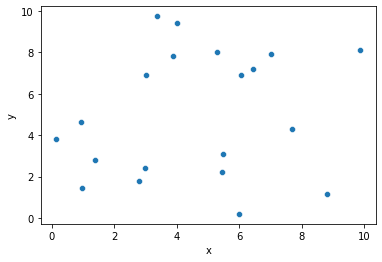

In [3]:
coords = coords_random(20, max_x=10, max_y=10)
sns.scatterplot(x=coords.x, y=coords.y)

<AxesSubplot:>

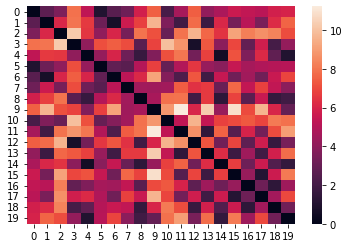

In [4]:
distances = coords_distances(coords, std_dev=0.1)
sns.heatmap(distances)

<class 'numpy.ndarray'>


<AxesSubplot:>

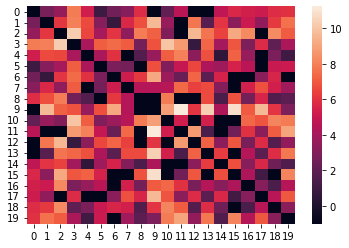

In [5]:
print(type(distances))
np.array(distances)
permitted_distances = disable_edges(distances, prohibition_p=0.1)
sns.heatmap(permitted_distances)

<AxesSubplot:>

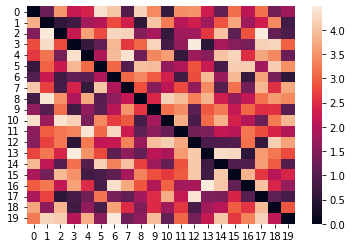

In [6]:
wind = wind_random(permitted_distances, max_velocity=2)
speed = 2.5
eff_speed = effective_speed(speed, wind)
sns.heatmap(eff_speed)

<AxesSubplot:>

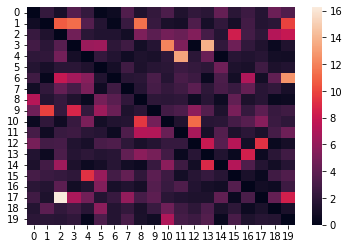

In [7]:
travel_t = travel_times(distances, eff_speed)
sns.heatmap(travel_t)

In [8]:
travel_t.max()

16.23691754310318

In [9]:
greedy_solution = graph_cycle_greedy_nn(travel_t, initial_vx=0)
greedy_solution

registering neighbours of 0
current_vx = 0, neighbours_to_visit = [5, 6, 2, 11, 8, 17, 15, 13, 12, 9, 4, 1, 16, 10, 19, 7, 3, 14, 18]
next_to_visit = 5
registering neighbours of 5
current_vx = 5, neighbours_to_visit = [6, 1, 16, 18, 8, 15, 4, 19, 9, 10, 3, 2, 13, 12, 11, 17, 7, 14]
next_to_visit = 6
registering neighbours of 6
current_vx = 6, neighbours_to_visit = [1, 13, 15, 17, 10, 7, 8, 12, 11, 9, 14, 18, 4, 3, 16, 2, 19]
next_to_visit = 1
registering neighbours of 1
current_vx = 1, neighbours_to_visit = [15, 11, 13, 10, 17, 18, 14, 9, 7, 16, 12, 4, 19, 2, 3, 8]
next_to_visit = 15
registering neighbours of 15
current_vx = 15, neighbours_to_visit = [17, 11, 16, 14, 12, 3, 8, 13, 2, 10, 18, 19, 9, 7, 4]
next_to_visit = 17
registering neighbours of 17
current_vx = 17, neighbours_to_visit = [12, 13, 11, 10, 8, 16, 9, 14, 18, 4, 7, 3, 19, 2]
next_to_visit = 12
registering neighbours of 12
current_vx = 12, neighbours_to_visit = [18, 16, 19, 4, 8, 3, 9, 7, 10, 11, 2, 14, 13]
next_to_visit 

[0, 5, 6, 1, 15, 17, 12, 18, 16, 14, 8, 4, 7, 19, 9, 2, 13, 11, 3, 10]

In [13]:
len(greedy_solution), distances.shape, len(set(greedy_solution))

(20, (20, 20), 20)